In [1]:
from src.preprocess.text import TextDataProcessor, Corpus
from src.models.lda import LDAModel
import pandas as pd

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


In [2]:
df_text = pd.read_csv(
    "/Users/Mikhail_Bulgakov/GitRepo/topic-modeling/data/clean_text_preprocessed_lemma_.csv"
)

In [3]:
ldamodel = LDAModel(framework="gensim", bigrams=True)

In [4]:
ldamodel.make_corpus(data_words=df_text["clean_text_array_norm"].str.split(" ").to_list())

100%|██████████| 13/13 [27:21<00:00, 126.28s/it]


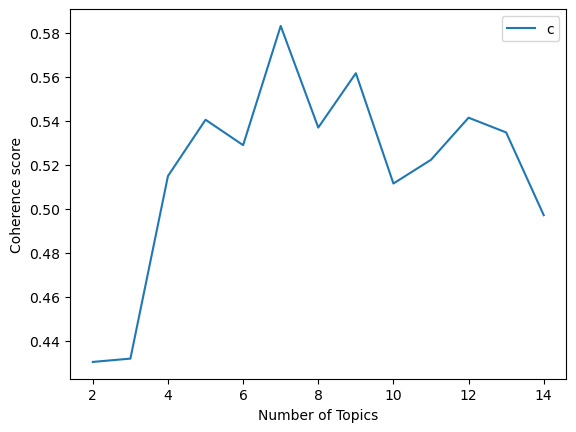

In [5]:
start, stop, step = 2, 15, 1
ldamodel.plot_coherence_graph(start=start,stop=stop,step=step)

In [ ]:
start, stop, step = 2, 15, 1
ldamodel.plot_coherence_graph(start=start,stop=stop,step=step)

In [6]:
num_of_topics = 7
num_of_words = 20

In [7]:
ldamodel.init_model(num_topics=num_of_topics)

In [8]:
ldamodel.model.print_topics(num_topics=num_of_topics, num_words=num_of_words)

[(0,
  '0.012*"это" + 0.011*"который" + 0.006*"год" + 0.006*"человек" + 0.005*"свой" + 0.005*"компания" + 0.005*"работа" + 0.005*"такой" + 0.004*"время" + 0.004*"система" + 0.004*"мочь" + 0.003*"работать" + 0.003*"один" + 0.003*"становиться" + 0.003*"другой" + 0.003*"новый" + 0.003*"очень" + 0.003*"все" + 0.003*"проект" + 0.003*"самый"'),
 (1,
  '0.017*"это" + 0.016*"который" + 0.008*"использовать" + 0.008*"код" + 0.006*"данный" + 0.006*"функция" + 0.005*"мочь" + 0.005*"такой" + 0.005*"один" + 0.005*"каждый" + 0.004*"нужно" + 0.004*"значение" + 0.004*"получать" + 0.004*"наш" + 0.004*"объект" + 0.004*"время" + 0.004*"приложение" + 0.004*"пример" + 0.004*"работать" + 0.004*"создавать"'),
 (2,
  '0.013*"сервер" + 0.010*"файл" + 0.009*"данный" + 0.007*"пользователь" + 0.006*"доступ" + 0.006*"база" + 0.006*"приложение" + 0.005*"настройка" + 0.005*"сеть" + 0.005*"сервис" + 0.005*"система" + 0.005*"использовать" + 0.004*"который" + 0.004*"версия" + 0.004*"пакет" + 0.004*"устанавливать" + 0.00

In [9]:
lda_df = pd.DataFrame(ldamodel.return_model_params(num_of_topics, num_of_words))

In [11]:
lda_df

,weights,words
0,"[0.012, 0.011, 0.006, 0.006, 0.005, 0.005, 0.0...","[это, который, год, человек, свой, компания, р..."
1,"[0.017, 0.016, 0.008, 0.008, 0.006, 0.006, 0.0...","[это, который, использовать, код, данный, функ..."
2,"[0.013, 0.01, 0.009, 0.007, 0.006, 0.006, 0.00...","[сервер, файл, данный, пользователь, доступ, б..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[valuetypetypename, privat, valuetypeclass, va..."
4,"[0.015, 0.009, 0.008, 0.007, 0.007, 0.006, 0.0...","[устройство, плата, датчик, контроллер, сигнал..."
5,"[0.013, 0.011, 0.008, 0.008, 0.008, 0.007, 0.0...","[return, new, string, int, value, data, type, ..."
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[valuetypetypename, privat, valuetypeclass, va..."


In [12]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

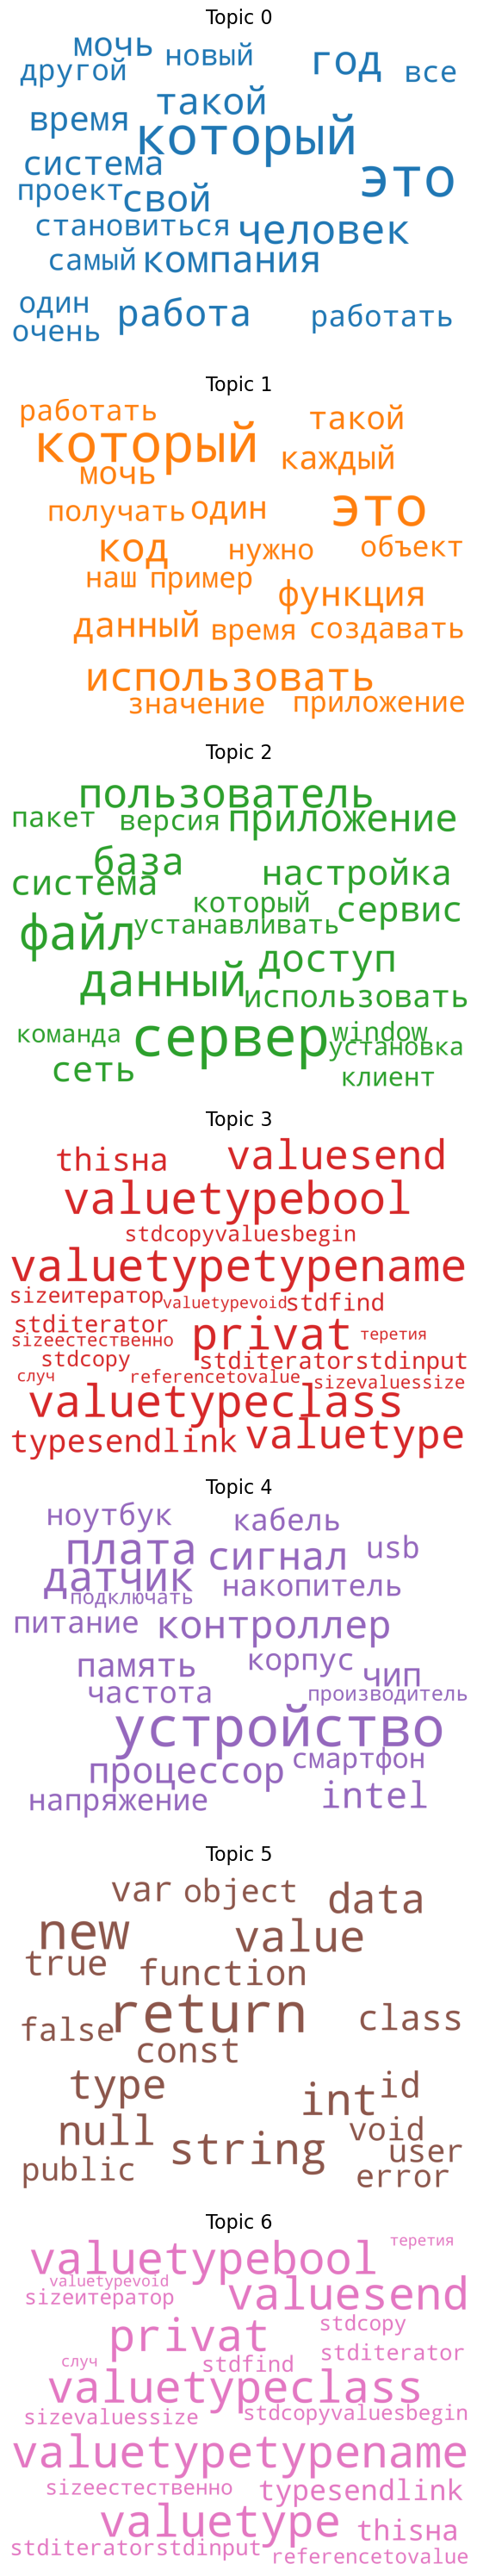

In [18]:
fig, axes = plt.subplots(num_of_topics, 1, figsize=(50,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = {i:abs(k) if abs(k)>0 else 0.0001 for i,k in zip(lda_df.iloc[i,1], lda_df.iloc[i,0])}
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()